# Image Classification with Convolution Neural Networks on Fashion MNIST Dataset 

### In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.

In [2]:
#import dependencies
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load and prepare data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

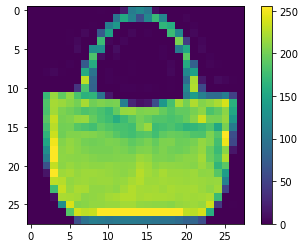

In [7]:
#verify images
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

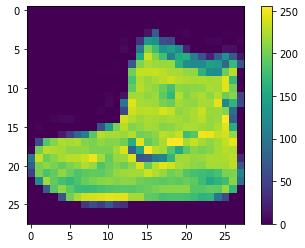

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

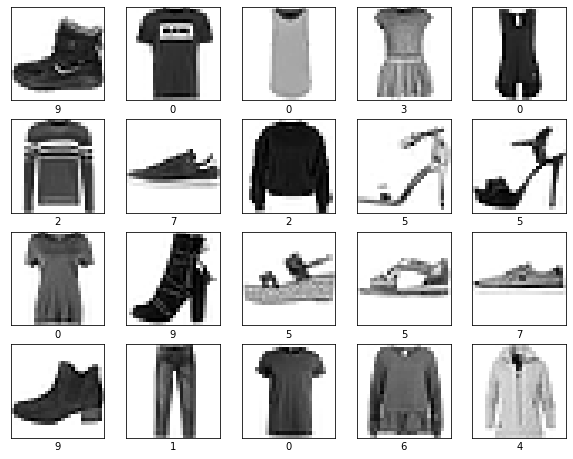

In [9]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# We have to scale the images from 0-1 to feed it into the Neural Network

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0


# Build model and setup layers

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5025 - accuracy: 0.8236
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3739 - accuracy: 0.8661
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3386 - accuracy: 0.8749
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3108 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2934 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2787 - accuracy: 0.8972
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2669 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2556 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2473 - accuracy: 0.9089
Epoch 10/10
6

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3665 - accuracy: 0.8732
Test accuracy: 0.8732


In [18]:
predictions = model.predict(test_images)
predictions[0]

array([6.6906197e-10, 1.6723162e-09, 3.6412229e-10, 2.3475603e-12,
       8.8135367e-12, 2.5244182e-04, 2.2010993e-10, 3.7101749e-03,
       1.2807067e-08, 9.9603736e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')
 

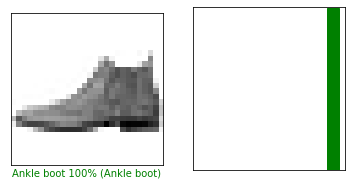

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

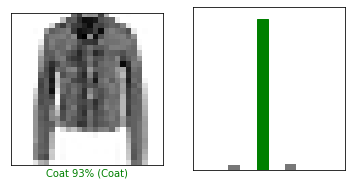

In [23]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# Now, let’s plot several images and their predictions. Correct ones are green, while the incorrect ones are red.

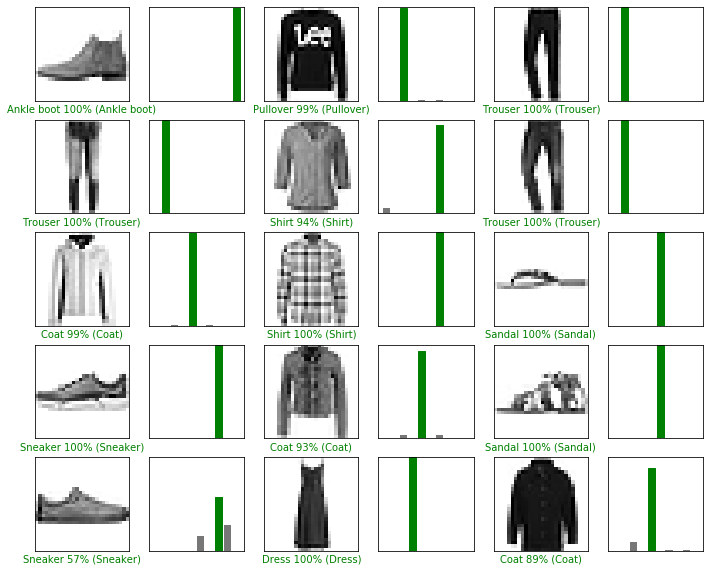

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [26]:
predictions_single = model.predict(img) 
print(predictions_single)
 

[[6.6906197e-10 1.6723194e-09 3.6412229e-10 2.3475649e-12 8.8135194e-12
  2.5244182e-04 2.2011076e-10 3.7101768e-03 1.2807043e-08 9.9603736e-01]]


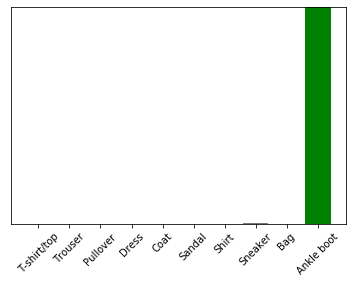

In [27]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
prediction_result = np.argmax(predictions_single[0])

In [29]:
prediction_result

9